## Main Objective:

**This is the dataset of the houses that were sold in Ames Iowa between 2006 and 2010. The objective of this report is to find out which aspects of a housing property are important in determining its selling price. The primary purpose of this regression based report will be based on interpretation of the various features in the dataset.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filepath = 'Week 3/Ames_housing_data.csv'

In [4]:
data = pd.read_csv(filepath)

In [5]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [6]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

In [7]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

## Brief Description of the Data:

**This dataset has 79 features that describe the various aspects of a home and one target column that is the Sale Price of the house. Some of the important features are the land area in sqaure feet of the variuos floors in the house, the garage area, whether the unit has an alley, whether it has centralized cooling/heating, the year in which the house was built and the year in which it was sold etc.**

---

## Data Exploration:

**There are 43 categorical features and 36 numerical features, of which 20 are float and 16 are integer type.**
**There are no empty cells in the dataset so for the purposes of data cleaning we can go straight to looking at the outliers.**

In [8]:
data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,1177.129804,353.424946,3.609862,2.865120,455.578680,48.102248,0.430747,0.058738,570.765047,21.039159,...,6.187092,2.920957,15.945613,6.552574,1074.445975,97.456853,1972.958666,1985.435098,2007.812183,185479.51124
std,387.014961,439.553171,30.154682,0.783961,459.691379,164.324665,0.514052,0.238285,443.677845,60.535107,...,1.345780,41.335545,57.249593,1.589821,436.371874,126.699192,29.379883,20.444852,1.330221,79023.89060
min,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1880.000000,1950.000000,2006.000000,35311.00000
25%,894.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,228.000000,0.000000,...,5.000000,0.000000,0.000000,5.000000,810.000000,0.000000,1955.000000,1968.000000,2007.000000,134000.00000
50%,1098.000000,0.000000,0.000000,3.000000,400.000000,0.000000,0.000000,0.000000,476.000000,0.000000,...,6.000000,0.000000,0.000000,6.000000,1008.000000,0.000000,1976.000000,1994.000000,2008.000000,167500.00000
75%,1414.000000,738.500000,0.000000,3.000000,732.000000,0.000000,1.000000,0.000000,811.000000,0.000000,...,7.000000,0.000000,0.000000,7.000000,1314.000000,171.000000,2001.000000,2004.000000,2009.000000,217750.00000
max,4692.000000,2065.000000,508.000000,6.000000,5644.000000,1474.000000,2.000000,2.000000,2336.000000,552.000000,...,10.000000,738.000000,480.000000,12.000000,6110.000000,857.000000,2010.000000,2010.000000,2010.000000,755000.00000


**We look at the histogram showing the Sale Price of the houses. We find that **

[Text(0.5, 0, 'Sale Price in USD'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Houses Sold at a Given Price')]

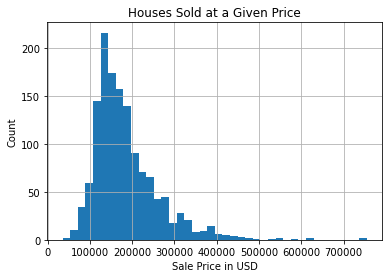

In [12]:
ax = data['SalePrice'].hist(bins = 40)
ax.set(xlabel = 'Sale Price in USD', ylabel = 'Count', title = 'Houses Sold at a Given Price')

In [202]:
len(data[data['SalePrice'] > 500000]['SalePrice'])

9

**There are 9 units sold for  price greater than 500000 and are outliers in our dataset. To ensure our regression interpretation is accurate for the majoirty of our dataset, we shall drop the rows corresponding to these outlier values.**

In [203]:
data = data[data['SalePrice']<=500000]

In [204]:
data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,...,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,1170.919708,348.968613,3.633577,2.862774,449.481752,48.024818,0.429197,0.058394,569.555474,21.177372,...,6.166423,2.535036,15.632847,6.526277,1067.062044,96.868613,1972.762044,1985.316058,2007.810219,182704.553285
std,379.849233,432.585603,30.252215,0.780609,451.108454,164.288041,0.513963,0.237667,442.326425,60.709645,...,1.324615,38.691385,56.836317,1.559521,426.825250,126.062150,29.371732,20.453302,1.328635,71127.540014
min,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1880.000000,1950.000000,2006.000000,35311.000000
25%,894.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,225.500000,0.000000,...,5.000000,0.000000,0.000000,5.000000,808.000000,0.000000,1955.000000,1967.250000,2007.000000,133925.000000
50%,1097.000000,0.000000,0.000000,3.000000,399.000000,0.000000,0.000000,0.000000,475.000000,0.000000,...,6.000000,0.000000,0.000000,6.000000,1006.000000,0.000000,1975.000000,1994.000000,2008.000000,167000.000000
75%,1400.000000,729.750000,0.000000,3.000000,724.000000,0.000000,1.000000,0.000000,811.000000,0.000000,...,7.000000,0.000000,0.000000,7.000000,1306.000000,169.750000,2001.000000,2004.000000,2009.000000,215150.000000
max,4692.000000,1818.000000,508.000000,6.000000,5644.000000,1474.000000,2.000000,2.000000,2336.000000,552.000000,...,10.000000,738.000000,480.000000,12.000000,6110.000000,857.000000,2010.000000,2010.000000,2010.000000,485000.000000


**Dropping these outliers only decreases the mean value of Sale Price by 3000 but reduces the standard deviation of sale price by 8000. Thus, these were clear outliers that would have introduces a greater uncertainity in our models.**

<AxesSubplot:>

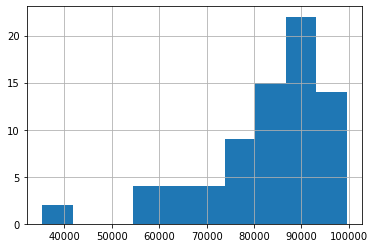

In [205]:
data[data['SalePrice']<100000]['SalePrice'].hist()

**Also there are some outliers that were sold for less than 50,000. We drop these outliers as well.**

In [206]:
data = data[data['SalePrice'] > 50000]

**We now have 1368 remaining rows.**

In [207]:
data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.00000,1368.000000,1368.000000,...,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.00000,1368.000000,1368.000000
mean,1171.806287,348.990497,3.638889,2.864035,450.102339,48.095029,0.429094,0.05848,569.599415,21.082602,...,6.171053,2.538743,15.655702,6.528509,1067.796784,97.010234,1972.817982,1985.36769,2007.811404,182916.613304
std,379.403838,432.713005,30.274018,0.779544,451.144818,164.397901,0.513976,0.23783,442.628571,60.614155,...,1.319477,38.719557,56.874731,1.559099,426.691720,126.099831,29.351460,20.42357,1.328695,70962.624621
min,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1880.000000,1950.00000,2006.000000,55993.000000
25%,894.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,224.750000,0.000000,...,5.000000,0.000000,0.000000,5.000000,809.500000,0.000000,1955.000000,1968.00000,2007.000000,134000.000000
50%,1097.000000,0.000000,0.000000,3.000000,399.500000,0.000000,0.000000,0.00000,475.000000,0.000000,...,6.000000,0.000000,0.000000,6.000000,1007.500000,0.000000,1975.000000,1994.00000,2008.000000,167120.000000
75%,1402.750000,730.500000,0.000000,3.000000,725.000000,0.000000,1.000000,0.00000,811.000000,0.000000,...,7.000000,0.000000,0.000000,7.000000,1306.750000,170.250000,2001.000000,2004.00000,2009.000000,215400.000000
max,4692.000000,1818.000000,508.000000,6.000000,5644.000000,1474.000000,2.000000,2.00000,2336.000000,552.000000,...,10.000000,738.000000,480.000000,12.000000,6110.000000,857.000000,2010.000000,2010.00000,2010.000000,485000.000000


<AxesSubplot:>

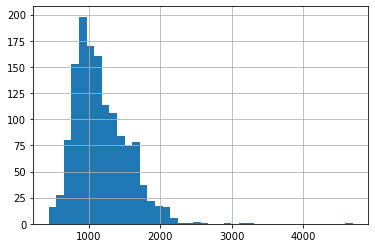

In [208]:
data['1stFlrSF'].hist(bins = 40)

<AxesSubplot:>

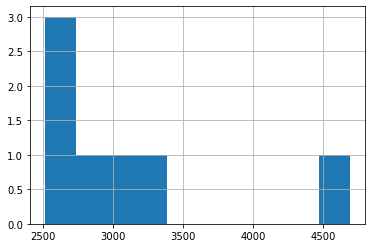

In [209]:
data[data['1stFlrSF'] > 2500]['1stFlrSF'].hist()

**There's an outlier in the first floor surface area. We get rid of the row for which the area is greater than 3500 sqft.**

In [210]:
data = data[data['1stFlrSF'] < 3500]

<AxesSubplot:>

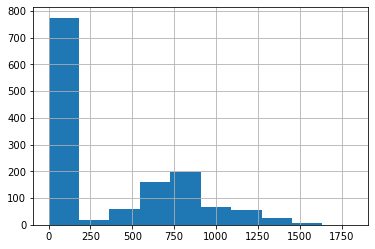

In [211]:
data['2ndFlrSF'].hist()

**Lots of values are equal to zero. Either we can use a transformation similar to one-hot encoding and just indicate whether the chosen house has a second floow or not or we can just use a box-cox tranformaion.**

In [212]:
cols = (data.std() > data.mean()) & (data.dtypes == float)

C:\Users\anush\AppData\Local\Temp/ipykernel_16852/235537636.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cols = (data.std() > data.mean()) & (data.dtypes == float)


In [213]:
cols

1stFlrSF        False
2ndFlrSF         True
3SsnPorch        True
Alley           False
BedroomAbvGr    False
                ...  
Utilities       False
WoodDeckSF       True
YearBuilt       False
YearRemodAdd    False
YrSold          False
Length: 80, dtype: bool

In [214]:
data.columns[cols]

Index(['2ndFlrSF', '3SsnPorch', 'BsmtFinSF2', 'EnclosedPorch', 'LowQualFinSF',
       'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'Street',
       'YearBuilt'],
      dtype='object')

In [215]:
data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,...,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,1169.231163,348.550841,3.641551,2.863936,446.302853,48.130212,0.427944,0.058522,569.675201,21.098025,...,6.168252,2.189466,15.667154,6.524506,1064.108266,96.924653,1972.792246,1985.351134,2007.811266,182933.377469
std,367.388685,432.565594,30.284937,0.779821,428.856164,164.452913,0.512403,0.237912,442.781678,60.633653,...,1.315885,36.514262,56.893968,1.552622,404.442361,126.106230,29.346756,20.421859,1.329171,70985.884549
min,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1880.000000,1950.000000,2006.000000,55993.000000
25%,894.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,224.500000,0.000000,...,5.000000,0.000000,0.000000,5.000000,809.000000,0.000000,1955.000000,1968.000000,2007.000000,134000.000000
50%,1097.000000,0.000000,0.000000,3.000000,399.000000,0.000000,0.000000,0.000000,476.000000,0.000000,...,6.000000,0.000000,0.000000,6.000000,1007.000000,0.000000,1975.000000,1994.000000,2008.000000,167240.000000
75%,1398.000000,729.500000,0.000000,3.000000,724.000000,0.000000,1.000000,0.000000,811.000000,0.000000,...,7.000000,0.000000,0.000000,7.000000,1306.000000,169.500000,2001.000000,2004.000000,2009.000000,215600.000000
max,3228.000000,1818.000000,508.000000,6.000000,2260.000000,1474.000000,2.000000,2.000000,2336.000000,552.000000,...,10.000000,738.000000,480.000000,12.000000,3206.000000,857.000000,2010.000000,2010.000000,2010.000000,485000.000000


In [13]:
mask = data.dtypes == float

In [14]:
float_cols = data.columns[mask]

In [15]:
skew_limit = 0.75

In [16]:
data[float_cols].skew() 

1stFlrSF          1.390283
2ndFlrSF          0.786109
3SsnPorch        10.007116
BsmtFinSF1        1.678351
BsmtFinSF2        4.194649
BsmtUnfSF         0.927963
EnclosedPorch     3.213038
GarageArea        0.811037
GarageYrBlt      -0.649415
GrLivArea         1.411296
LotArea          12.013038
LotFrontage       2.712348
LowQualFinSF     10.712587
MasVnrArea        2.601035
MiscVal          24.841008
OpenPorchSF       2.246211
PoolArea         14.406273
ScreenPorch       3.987031
TotalBsmtSF       1.621602
WoodDeckSF        1.504088
SalePrice         1.935362
dtype: float64

In [31]:
mask = abs(data[float_cols].skew()) > skew_limit

In [32]:
mask

1stFlrSF          True
2ndFlrSF          True
3SsnPorch         True
BsmtFinSF1        True
BsmtFinSF2        True
BsmtUnfSF         True
EnclosedPorch     True
GarageArea        True
GarageYrBlt      False
GrLivArea         True
LotArea           True
LotFrontage       True
LowQualFinSF      True
MasVnrArea        True
MiscVal           True
OpenPorchSF       True
PoolArea          True
ScreenPorch       True
TotalBsmtSF       True
WoodDeckSF        True
SalePrice         True
dtype: bool

In [33]:
data_float = data[float_cols]

In [34]:
data_skew = data[data_float.columns[mask]]

In [35]:
data_skew

,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,GarageArea,GrLivArea,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,PoolArea,ScreenPorch,TotalBsmtSF,WoodDeckSF,SalePrice
0,856.0,854.0,0.0,706.0,0.0,150.0,0.0,548.0,1710.0,8450.0,65.0,0.0,196.0,0.0,61.0,0.0,0.0,856.0,0.0,208500.0
1,1262.0,0.0,0.0,978.0,0.0,284.0,0.0,460.0,1262.0,9600.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,1262.0,298.0,181500.0
2,920.0,866.0,0.0,486.0,0.0,434.0,0.0,608.0,1786.0,11250.0,68.0,0.0,162.0,0.0,42.0,0.0,0.0,920.0,0.0,223500.0
3,961.0,756.0,0.0,216.0,0.0,540.0,272.0,642.0,1717.0,9550.0,60.0,0.0,0.0,0.0,35.0,0.0,0.0,756.0,0.0,140000.0
4,1145.0,1053.0,0.0,655.0,0.0,490.0,0.0,836.0,2198.0,14260.0,84.0,0.0,350.0,0.0,84.0,0.0,0.0,1145.0,192.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,0.0,0.0,953.0,0.0,460.0,1647.0,7917.0,62.0,0.0,0.0,0.0,40.0,0.0,0.0,953.0,0.0,175000.0
1375,2073.0,0.0,0.0,790.0,163.0,589.0,0.0,500.0,2073.0,13175.0,85.0,0.0,119.0,0.0,0.0,0.0,0.0,1542.0,349.0,210000.0
1376,1188.0,1152.0,0.0,275.0,0.0,877.0,0.0,252.0,2340.0,9042.0,66.0,0.0,0.0,2500.0,60.0,0.0,0.0,1152.0,0.0,266500.0
1377,1078.0,0.0,0.0,49.0,1029.0,0.0,112.0,240.0,1078.0,9717.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,1078.0,366.0,142125.0


In [38]:
log_transform_float_skew =  abs(np.log1p(data_skew).skew()) > 0.75

In [48]:
data[data['3SsnPorch']==0]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,None,3,1Fam,None,None,0.0,0.0,...,0.0,Pave,7,953.0,AllPub,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,None,3,1Fam,TA,No,790.0,163.0,...,0.0,Pave,7,1542.0,AllPub,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,None,4,1Fam,Gd,No,275.0,0.0,...,0.0,Pave,9,1152.0,AllPub,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,None,2,1Fam,TA,Mn,49.0,1029.0,...,0.0,Pave,5,1078.0,AllPub,366.0,1950,1996,2010,142125.0


In [49]:
sum = 0
for i in log_transform_float_skew:
    if i==True:
        sum +=1
sum

9

In [50]:
float_cols

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF',
       'SalePrice'],
      dtype='object')

In [51]:
mask = data.dtypes == object

In [52]:
categorical_cols = data.columns[mask]

In [53]:
data = pd.get_dummies(data, categorical_cols, drop_first = True)

In [54]:
data.dtypes.value_counts()

uint8      215
float64     21
int64       16
dtype: int64

In [55]:
X = data.drop('SalePrice', axis = 1)
y = data[['SalePrice']]

In [56]:
for col in float_cols:
    if col == 'SalePrice':
        y[col] = np.log1p(y[col])
    else:
        X[col]  = np.log1p(X[col])

C:\Users\anush\AppData\Local\Temp/ipykernel_21260/1722375766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[col] = np.log1p(y[col])


## Regression:

In [57]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [58]:
s = StandardScaler()
lr = LinearRegression()
kf = KFold(shuffle = True, random_state = 274, n_splits = 3)

In [59]:
estimator = Pipeline([('scaler', s), ('regression', lr)])

In [60]:
y_predict = cross_val_predict(estimator, X, y, cv = kf)

In [61]:
r2_score(y, y_predict)

-1.2320107348660284e+24

In [62]:
estimator.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [63]:
len(lr.coef_[0])

251

In [64]:
sum = 0
for i in range(len(lr.coef_[0])):
    if abs(lr.coef_[0][i]) > 0.01:
        sum +=1
        print(i)
sum

0
4
5
10
12
13
15
17
18
20
21
22
23
26
27
28
29
30
31
32
33
43
44
48
52
59
61
62
63
64
66
68
76
85
88
90
91
92
93
94
96
101
106
107
108
110
112
115
116
127
128
129
137
138
139
140
141
144
145
146
147
148
149
150
152
154
161
169
170
171
184
185
186
187
188
189
190
191
192
193
199
200
201
202
204
205
206
208
211
213
216
221
223
224
225
226
227
228
229
230
235
239
240
246
247


105

In [65]:
lr_columns_coeff = pd.DataFrame(zip(X.columns, abs(lr.coef_[0])))

In [66]:
lr_columns_coeff

,0,1
0,1stFlrSF,0.015552
1,2ndFlrSF,0.007144
2,3SsnPorch,0.002702
3,BedroomAbvGr,0.004219
4,BsmtFinSF1,0.061766
...,...,...
246,SaleType_New,0.038115
247,SaleType_Oth,0.014037
248,SaleType_WD,0.003877
249,Street_Pave,0.005638


In [67]:
lr_columns_chosen = lr_columns_coeff[1] > 0.01

In [68]:
lr_columns_coeff[lr_columns_chosen]

,0,1
0,1stFlrSF,0.015552
4,BsmtFinSF1,0.061766
5,BsmtFinSF2,0.020138
10,Fireplaces,0.010677
12,GarageArea,0.012454
...,...,...
235,RoofStyle_Shed,0.010283
239,SaleCondition_Normal,0.021428
240,SaleCondition_Partial,0.013798
246,SaleType_New,0.038115


## Polynomial Features

In [69]:
pf = PolynomialFeatures(degree = 2)

In [70]:
estimator_pf = Pipeline([('scaler', s), ('polynomial_features', pf), ('regression', lr)])
y_predict_pf = cross_val_predict(estimator_pf, X, y, cv = kf)

In [71]:
r2_score(y, y_predict_pf)

0.6865304087369246

In [72]:
estimator_pf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial_features', PolynomialFeatures()),
                ('regression', LinearRegression())])

In [73]:
len(lr.coef_[0])

31878

In [74]:
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(data.columns,p) for p in pf.powers_]]


data_pf = pd.DataFrame(pf.fit_transform(X), columns = target_feature_names)

In [75]:
pf_columns_coeff = pd.DataFrame(zip(data_pf.columns, abs(lr.coef_[0])))

In [76]:
pf_columns_coeff

,0,1
0,,9.354526e-06
1,1stFlrSF^1,1.002501e-02
2,2ndFlrSF^1,3.170062e-03
3,3SsnPorch^1,9.887173e-05
4,BedroomAbvGr^1,4.742287e-03
...,...,...
31873,SaleType_Oth^1xSaleType_WD^1,4.823692e-05
31874,SaleType_Oth^1xStreet_Pave^1,8.234667e-05
31875,SaleType_WD^2,1.864718e-04
31876,SaleType_WD^1xStreet_Pave^1,1.289767e-06


In [77]:
pf_columns_chosen = pf_columns_coeff[1] > 0.01

In [78]:
pf_columns_coeff[pf_columns_chosen]

,0,1
1,1stFlrSF^1,0.010025
16,GrLivArea^1,0.012016
4855,LotFrontage^1xMoSold^1,0.016923
6000,MoSold^2,0.011306


## Lasso

In [79]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

In [80]:
estimator_lasso = Pipeline([('scaler', s), ('lasso', Lasso())])


params = {
    'lasso__alpha': np.geomspace(1e-4, 0.01, 20)
}

grid = GridSearchCV(estimator_lasso, params, cv=kf)

In [81]:
grid.fit(X,y)

C:\Users\anush\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018125455033151994, tolerance: 0.012896551701921699
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=KFold(n_splits=3, random_state=274, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([0.0001    , 0.00012743, 0.00016238, 0.00020691, 0.00026367,
       0.00033598, 0.00042813, 0.00054556, 0.00069519, 0.00088587,
       0.00112884, 0.00143845, 0.00183298, 0.00233572, 0.00297635,
       0.00379269, 0.00483293, 0.00615848, 0.0078476 , 0.01      ])})

In [82]:
grid.best_score_, grid.best_params_

(0.8776963540646948, {'lasso__alpha': 0.007847599703514606})

In [83]:
y_predict_lasso = grid.predict(X)

In [84]:
r2_score(y, y_predict_lasso)

0.9040330454554462

In [85]:
grid.best_estimator_.named_steps['lasso'].coef_;

In [86]:
lasso_columns_coeff = pd.DataFrame(zip(X.columns, grid.best_estimator_.named_steps['lasso'].coef_)).sort_values(by = 1)

In [105]:
lasso_columns_zero = abs(lasso_columns_coeff[1]) == 0.0

In [107]:
lasso_columns_coeff[lasso_columns_zero].sort_values(by = 1, ascending = False)

,0,1
175,LandSlope_Mod,0.0
71,Condition1_RRNe,-0.0
46,BsmtExposure_Mn,0.0
24,MoSold,-0.0
23,MiscVal,-0.0
...,...,...
247,SaleType_Oth,0.0
248,SaleType_WD,-0.0
235,RoofStyle_Shed,0.0
219,PavedDrive_P,-0.0


In [87]:
lasso_columns_chosen = abs(lasso_columns_coeff[1]) > 0.01

In [88]:
lasso_columns_coeff[lasso_columns_coeff[0]== 'KitchenQual_Gd']

,0,1
170,KitchenQual_Gd,-0.0


In [91]:
lasso_columns_coeff[lasso_columns_chosen].sort_values(by = 1, ascending = False)

,0,1
15,GrLivArea,0.115915
27,OverallQual,0.097559
33,YearBuilt,0.052352
18,LotArea,0.041409
13,GarageCars,0.035829
26,OverallCond,0.035094
0,1stFlrSF,0.030039
4,BsmtFinSF1,0.028625
210,Neighborhood_NridgHt,0.019183
34,YearRemodAdd,0.016260


## Ridge

In [92]:
from sklearn.linear_model import RidgeCV

In [93]:
estimator_ridge = Pipeline([('scaler', s), ('ridge', Ridge(alpha= 0.0003))])


params = {
    'ridge__alpha': np.geomspace(1e-5, 1e5, 10)
}

grid_r = GridSearchCV(estimator_ridge, params, cv=kf)

In [94]:
grid_r.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=274, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge(alpha=0.0003))]),
             param_grid={'ridge__alpha': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05])})

In [95]:
grid_r.best_score_, grid_r.best_params_

(0.8597994419047007, {'ridge__alpha': 599.4842503189421})

In [96]:
y_predict_r = grid_r.predict(X)

In [97]:
r2_score(y, y_predict_r)

0.9144644615510709

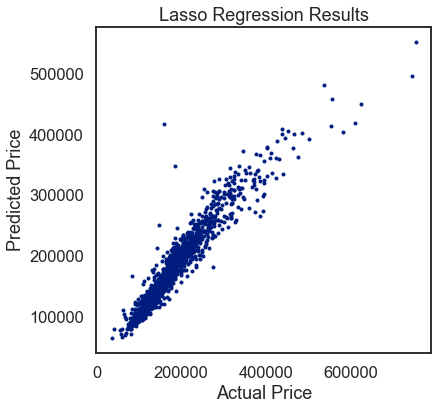

In [125]:
import seaborn as sns

sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')
f = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.plot(np.exp(y), np.exp(y_predict_r), marker='o', ls='', ms=3.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Lasso Regression Results');

In [98]:
grid_r.best_estimator_.named_steps['ridge'].coef_;

In [99]:
ridge_columns_coeff = pd.DataFrame(zip(X.columns, grid_r.best_estimator_.named_steps['ridge'].coef_[0])).sort_values(by = 1)

In [110]:
ridge_columns_zero = abs(ridge_columns_coeff[1]) == 0.0

In [111]:
ridge_columns_coeff[ridge_columns_zero].sort_values(by = 1, ascending = False)

,0,1


In [112]:
ridge_columns_chosen = abs(ridge_columns_coeff[1]) > 0.01

In [113]:
ridge_columns_coeff[ridge_columns_chosen].sort_values(by = 1, ascending = False)

,0,1
27,OverallQual,0.044773
15,GrLivArea,0.042723
0,1stFlrSF,0.034626
26,OverallCond,0.024284
30,TotRmsAbvGrd,0.022681
13,GarageCars,0.021919
18,LotArea,0.021676
210,Neighborhood_NridgHt,0.021289
11,FullBath,0.018421
34,YearRemodAdd,0.016824


The r2 score for Ridge regression is the greatest. However, Lasso is better for interpetation as it sets the oefficients orresponding to a number of features to be zero. This is helpful forour purpose because we are interested in nderstanding the most important features that decide the Sale Price of a house out of a large number of input features. Lasso only allows the coefficients for 34 features to have a absolute value greater than 0.01 whereas for Ridge the number is 52. Moreover, the difference in the r2 score is minimal and can be ignored.

In [530]:
data['GrLivArea']

0       1710.0
1       1262.0
2       1786.0
3       1717.0
4       2198.0
         ...  
1374    1647.0
1375    2073.0
1376    2340.0
1377    1078.0
1378    1256.0
Name: GrLivArea, Length: 1367, dtype: float64

We first dealt with the float columns that had a skew value greater than 0.75. Then, in our chosen model we first used a standard scaler that expresses all the x values in a column by transforming them as (x - $\mu$)/$\sigma$. Then we use a Lasso regression technique in which we try a number of alpha values to find the one that gives the bets fit. We find the best fit lasso alpha value is 0.00297.  

The most important features in deciding the sale price of a house in our Ames housing sales dataset are the Ground Living Area, Overall Quality, Year Built, Overall Condition. The feature that has the most negative effect on the sale price of a house is if the kitchen is above ground and if the house is close to a park and if the heating quality is only typical.

We can use polynomial features along with Lasso regression and see if what the improvements in our model are. While this woldn't be too useful in improving the interpretability ofour dataset, it'll help in increasing our model's predictability. 
Data regarding crime in the neighborhood could be a useful feature that will improve the model.

****